In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme()

### Load training data

In [2]:
train_identity_df = pd.read_csv('./ieee-fraud-detection/train_identity.csv')

train_identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [3]:
train_transaction_df = pd.read_csv('./ieee-fraud-detection/train_transaction.csv')

train_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f'{train_identity_df.shape = }')
print(f'{train_transaction_df.shape = }')

train_identity_df.shape = (144233, 41)
train_transaction_df.shape = (590540, 394)


In [5]:
len(set(train_identity_df['TransactionID']) - set(train_transaction_df['TransactionID']))

0

In [6]:
len(set(train_transaction_df['TransactionID']) - set(train_identity_df['TransactionID']))

446307

### Load test data

In [7]:
test_identity_df = pd.read_csv('./ieee-fraud-detection/test_identity.csv')

test_identity_df.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [8]:
test_transaction_df = pd.read_csv('./ieee-fraud-detection/test_transaction.csv')

test_transaction_df.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(f'{test_identity_df.shape = }')
print(f'{test_transaction_df.shape = }')

test_identity_df.shape = (141907, 41)
test_transaction_df.shape = (506691, 393)


### Join the identity and transaction tables

In [10]:
train_df = train_transaction_df.merge(train_identity_df, on='TransactionID', how='left')
test_df = test_transaction_df.merge(test_identity_df, on='TransactionID', how='left')

In [11]:
print(f'{train_df.shape =}')
train_df.head()

train_df.shape =(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [12]:
print(f'{test_df.shape = }')
test_df.head()

test_df.shape = (506691, 433)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing

### Drop columns that have too many missing values

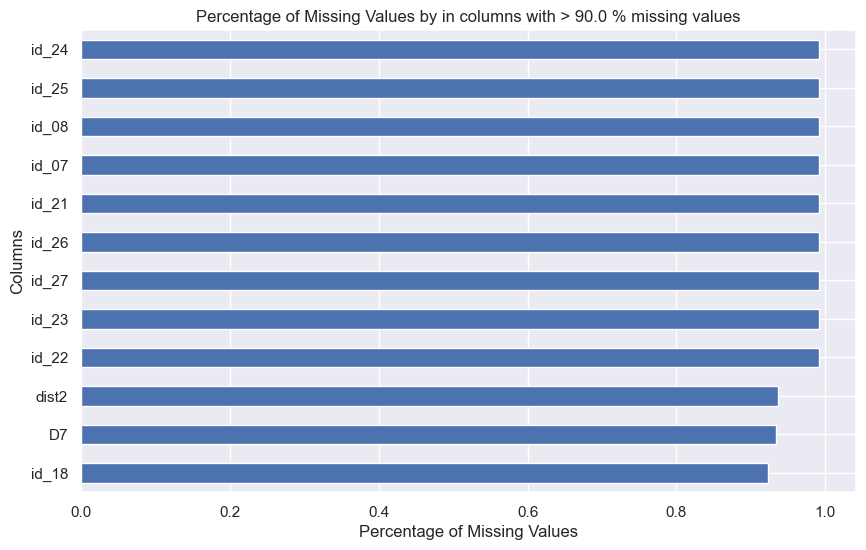

In [13]:
missing_percentages = train_df.isnull().mean()
missing_thr = 0.9

plt.figure(figsize=(10, 6))
missing_percentages[missing_percentages > missing_thr].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title(f'Percentage of Missing Values by in columns with > {missing_thr * 100} % missing values')
plt.show()

In [14]:
N = len(train_df)
n_cols_before = train_df.shape[1]
train_df = train_df.loc[:, train_df.isnull().mean() < missing_thr]
print(f"Number of columns {n_cols_before} -> {train_df.shape[1]}")

Number of columns 434 -> 422


### Create os feature

In [15]:
train_df['id_30'].unique()

array([nan, 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 10

In [16]:
# Create a new feature called id_30
train_df['os'] = train_df['id_30'].str.split(' ', n=1, expand=True)[0]
train_df.drop('id_30', axis=1, inplace=True)
train_df['os'].head()

0        NaN
1        NaN
2        NaN
3        NaN
4    Android
Name: os, dtype: object

### Screen size feature

In [17]:
train_df['id_33'].unique()

array([nan, '2220x1080', '1334x750', '1280x800', '1366x768', '1920x1080',
       '1680x1050', '1136x640', '5120x2880', '2880x1800', '1920x1200',
       '2560x1600', '2048x1536', '1024x768', '1280x720', '2560x1440',
       '2208x1242', '2001x1125', '1440x900', '1600x900', '2672x1440',
       '1280x1024', '960x540', '2732x2048', '2436x1125', '2048x1152',
       '2960x1440', '1024x600', '855x480', '4096x2304', '2160x1440',
       '2562x1442', '801x480', '2736x1824', '3441x1440', '2880x1620',
       '3840x2160', '1638x922', '1280x768', '1360x768', '1280x960',
       '3440x1440', '1152x720', '1280x1025', '3360x2100', '2304x1296',
       '1152x864', '3200x1800', '2112x1188', '2224x1668', '2400x1350',
       '2000x1125', '1600x1000', '2560x1080', '1728x972', '3000x2000',
       '1024x640', '3840x2400', '2304x1440', '1280x600', '1400x1050',
       '1600x1200', '3201x1800', '1356x900', '1344x756', '1624x1080',
       '1536x864', '1800x1125', '1920x1281', '2961x1442', '1366x1024',
       '1344x8

In [18]:
train_df[['width', 'height']] = train_df['id_33'].str.split('x', n=1, expand=True).apply(pd.to_numeric)
train_df.drop('id_33', axis=1, inplace=True)
train_df[['width', 'height']].head()

,width,height
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,2220.0,1080.0


### Browser feature

In [19]:
train_df['id_31'].unique()

array([nan, 'samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0',
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa

In [20]:
train_df['browser'] = train_df['id_31'].str.split(' ', expand=True)[0].str.lower()
train_df.drop('id_31', axis=1, inplace=True)
train_df['browser'].head()

0        NaN
1        NaN
2        NaN
3        NaN
4    samsung
Name: browser, dtype: object

In [21]:
train_df['browser'].unique()

array([nan, 'samsung', 'mobile', 'chrome', 'edge', 'safari', 'firefox',
       'ie', 'other', 'android', 'opera', 'generic/android',
       'samsung/sm-g532m', 'aol', 'samsung/sch', 'silk',
       'samsung/sm-g531h', 'waterfox', 'nokia/lumia', 'puffin',
       'microsoft/windows', 'cyberfox', 'zte/blade', 'palemoon',
       'maxthon', 'line', 'lg/k-200', 'iron', 'blu/dash', 'seamonkey',
       'm4tel/m4', 'comodo', 'lanix/ilium', 'chromium', 'inco/minion',
       'mozilla/firefox', 'cherry', 'icedragon', 'google', 'facebook'],
      dtype=object)

In [22]:
# Map browser names to most common ones and group others into "other".
browser_mapping = {
    'samsung': 'samsung',
    'samsung/sm-g532m': 'samsung',
    'samsung/sch': 'samsung',
    'samsung/sm-g531h': 'samsung',
    'mobile': 'mobile',
    'chrome': 'chrome',
    'chromium': 'chrome',
    'firefox': 'firefox',
    'mozilla/firefox': 'firefox',
    'waterfox': 'firefox',
    'cyberfox': 'firefox',
    'icedragon': 'firefox',
    'edge': 'edge',
    'ie': 'ie',
    'safari': 'safari',
    'android': 'android',
    'generic/android': 'android',
    'opera': 'opera',
    'silk': 'opera',
    'palemoon': 'other',
    'maxthon': 'other',
    'line': 'other',
    'iron': 'other',
    'blu/dash': 'other',
    'seamonkey': 'other',
    'm4tel/m4': 'other',
    'comodo': 'other',
    'lanix/ilium': 'other',
    'inco/minion': 'other',
    'cherry': 'other',
    'google': 'google',
    'facebook': 'facebook',
    'aol': 'other',
    'zte/blade': 'other',
    'nokia/lumia': 'other',
    'lg/k-200': 'other',
    'microsoft/windows': 'windows',
    np.nan: 'unknown'
}

train_df['browser'] = train_df['browser'].map(browser_mapping)

train_df['browser'].unique()

array(['unknown', 'samsung', 'mobile', 'chrome', 'edge', 'safari',
       'firefox', 'ie', nan, 'android', 'opera', 'other', 'windows',
       'google', 'facebook'], dtype=object)

### Transaction Hour and day of the week

In [23]:
train_df['TransactionHour'] = (train_df['TransactionDT'] // (60 * 60)) % 24
train_df['TransactionDayOfWeek'] = (train_df['TransactionDT'] // (60 * 60 * 24)) % 7

In [24]:
v_cols = [c for c in train_df.columns if c.startswith("V")]

v_df = train_df[v_cols]
missing_counts = v_df.isnull().sum()
groups = {}
for col, count in missing_counts.items():
    groups.setdefault(count, []).append(col)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

count = 0
new_v_features = []
for group in groups.values():
    df_group = train_df[group].copy()
    df_group.fillna(-999, inplace=True)
    v_normalized = StandardScaler().fit_transform(df_group)
    pca = PCA().fit(v_normalized)
    explained_variance = pca.explained_variance_ratio_.cumsum()
    n_components = (explained_variance >= 0.9).argmax() + 1  # Find the first index where variance >= 90%
    print(f"Group: {group}, Components to Retain: {n_components}")
    
    pca_reduced = PCA(n_components=n_components)
    reduced_data = pca_reduced.fit_transform(v_normalized)
    for i in range(n_components):
        train_df[f'V_pca_{count}'] = reduced_data[:, i]
        new_v_features.append(f'V_pca_{count}')
        count += 1

print(f'Total V features created: {len(new_v_features)}')

Group: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'], Components to Retain: 1
Group: ['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34'], Components to Retain: 1
Group: ['V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52'], Components to Retain: 1
Group: ['V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74'], Components to Retain: 1
Group: ['V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94'], Components to Retain: 1
Group: ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',

In [26]:
train_df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V_pca_17', 'V_pca_18', 'V_pca_19', 'V_pca_20', 'V_pca_21', 'V_pca_22',
       'V_pca_23', 'V_pca_24', 'V_pca_25', 'V_pca_26'],
      dtype='object', length=452)

In [27]:
def create_email_features(train_df, col):
    train_df[col] = train_df[col].fillna('unknown')
    fraud_correlation = train_df.groupby(col)['isFraud'].mean()
    train_df[f'{col}_fraud_corr'] = train_df[col].map(fraud_correlation)
    
    common_providers = ['gmail.com', 'yahoo.com', 'hotmail.com', 'outlook.com', 'icloud.com']
    train_df[f'{col}_email_provider'] = train_df[col].apply(
        lambda x: x if x in common_providers else 'other'
    )
    train_df[f'{col}_email_tld'] = train_df[col].str.split(' ', n=1, expand=True).apply(
        lambda x: x[1] if len(x) > 1 else 'unknown'
    )

create_email_features(train_df, 'P_emaildomain')
create_email_features(train_df, 'R_emaildomain')

In [28]:
cand_categorical_features = ([
    'ProductCD',
    'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
    'addr1', 'addr2',
    'P_emaildomain_email_provider', 'P_emaildomain_email_tld',
    'R_emaildomain_email_provider', 'R_emaildomain_email_tld',
    'DeviceType', 'DeviceInfo',
    'os', 'browser',
]
+ [f'id_{i}' for i in range(12, 39)] # id features
+ [f'M{i}' for i in range(1, 10)]  # M features
)

cat_thr = 15
categorical_features = [c for c in cand_categorical_features if c in train_df and train_df[c].nunique() < cat_thr]

numerical_features = (
    ['TransactionAmt', 'TransactionHour', 'TransactionDayOfWeek', 'dist1']
    + ['P_emaildomain_fraud_corr', 'R_emaildomain_fraud_corr']
    + new_v_features  # V features
    + [f'D{i}' for i in range(1, 15) if f'D{i}' in train_df.columns] # D features.
    + [c for c in train_df.columns if c.startswith("C")] # C features
    + [c for c in cand_categorical_features if c in train_df.columns and train_df[c].nunique() >= cat_thr and c != "DeviceInfo"]
    + ['width', 'height']
)

print(categorical_features)
print(numerical_features)

['ProductCD', 'card4', 'card6', 'P_emaildomain_email_provider', 'P_emaildomain_email_tld', 'R_emaildomain_email_provider', 'R_emaildomain_email_tld', 'DeviceType', 'os', 'browser', 'id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_32', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
['TransactionAmt', 'TransactionHour', 'TransactionDayOfWeek', 'dist1', 'P_emaildomain_fraud_corr', 'R_emaildomain_fraud_corr', 'V_pca_0', 'V_pca_1', 'V_pca_2', 'V_pca_3', 'V_pca_4', 'V_pca_5', 'V_pca_6', 'V_pca_7', 'V_pca_8', 'V_pca_9', 'V_pca_10', 'V_pca_11', 'V_pca_12', 'V_pca_13', 'V_pca_14', 'V_pca_15', 'V_pca_16', 'V_pca_17', 'V_pca_18', 'V_pca_19', 'V_pca_20', 'V_pca_21', 'V_pca_22', 'V_pca_23', 'V_pca_24', 'V_pca_25', 'V_pca_26', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',

In [29]:
orig_train_df = train_df.copy()
orig_train_df[['TransactionDayOfWeek']]

,TransactionDayOfWeek
0,1
1,1
2,1
3,1
4,1
...,...
590535,0
590536,0
590537,0
590538,0


### Remove outliers

Convert outliers to NaNs so that they can be imputed.

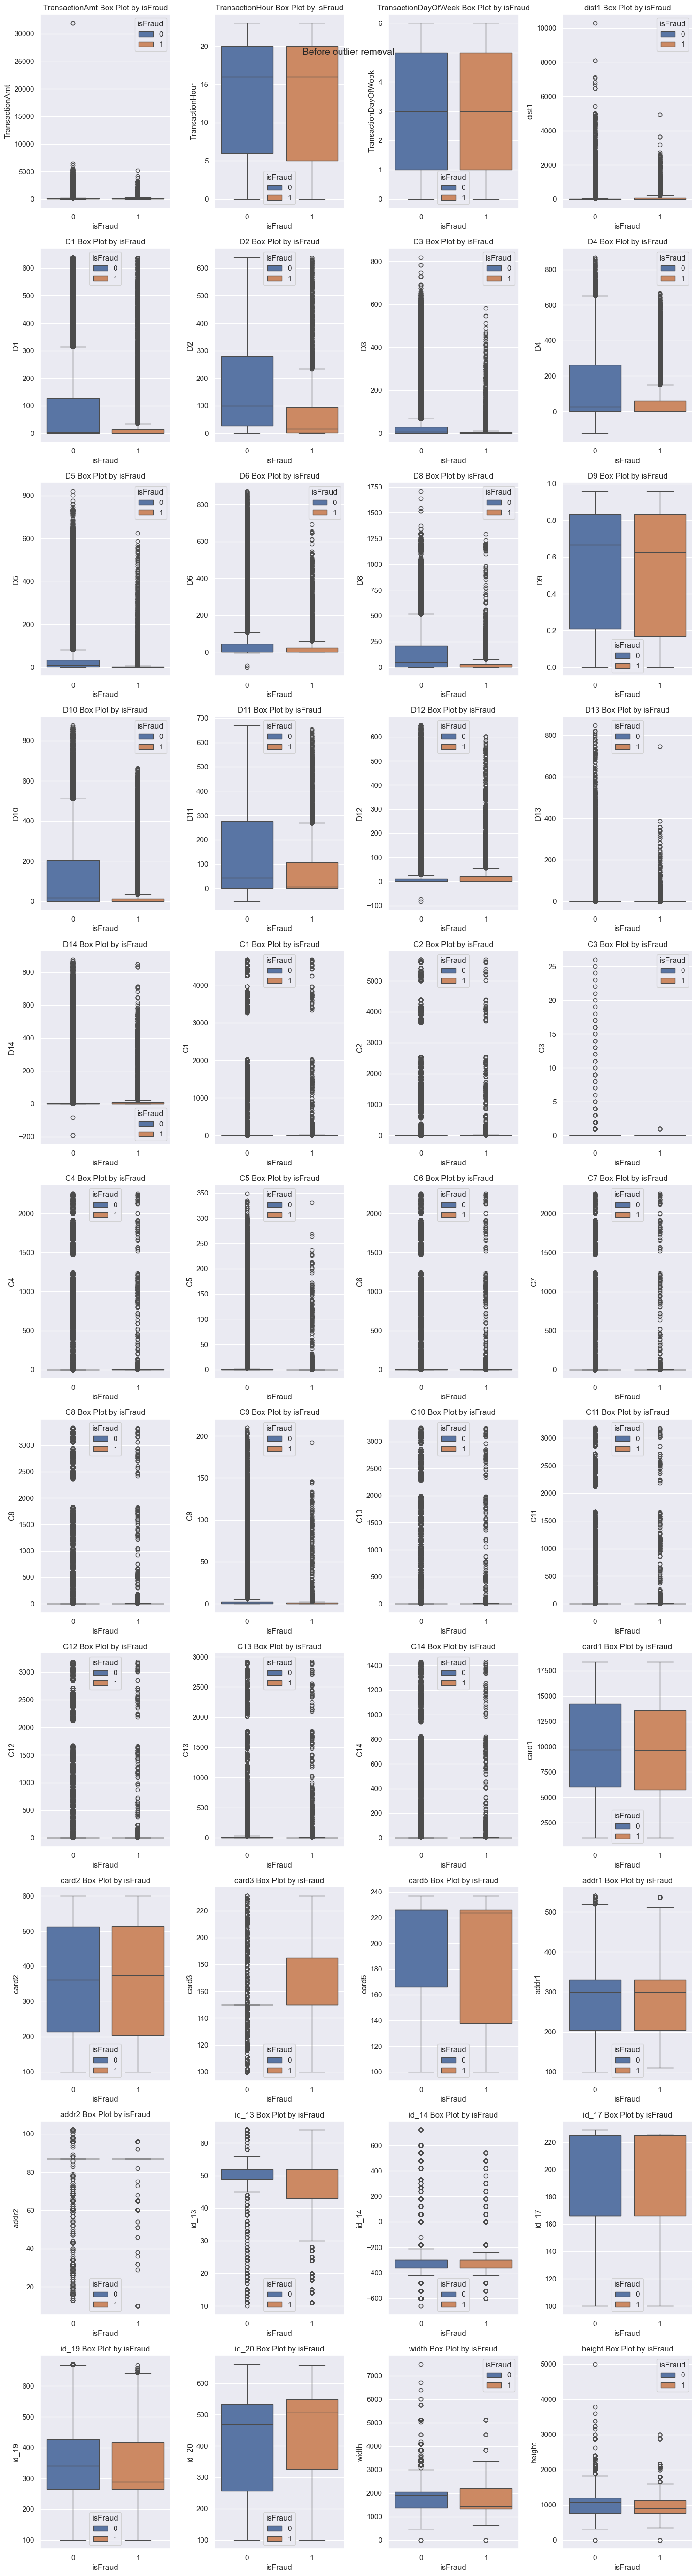

In [30]:
import math

cand_outlier_cols = [c for c in numerical_features if "pca" not in c and "fraud_corr" not in c]
num_features = len(cand_outlier_cols)
cols = 4
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=False)
axes = axes.flatten()
for i, col in enumerate(cand_outlier_cols):

    sns.boxplot(ax=axes[i], x='isFraud', y=col, data=train_df, hue='isFraud')
    axes[i].set_title(f'{col} Box Plot by isFraud')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('isFraud')
    axes[i].legend(title='isFraud')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Before outlier removal')
plt.show()

In [31]:
# Use IQR method for outlier removal

# If outliers are removed for features, the validation auc of RandomForest reduces from 0.9337 to 0.9317.
# So the outlier removal is disabled.

def remove_outliers(train_df):
    for col in cand_categorical_features:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Mark values outside the bounds as NaN
        train_df.loc[(train_df[col] < lower_bound) |  (train_df[col] > upper_bound), col] = np.nan


    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=False)
    axes = axes.flatten()
    for i, col in enumerate(cand_outlier_cols):

        sns.boxplot(ax=axes[i], x='isFraud', y=col, data=train_df, hue='isFraud')
        axes[i].set_title(f'{col} Box Plot by isFraud')
        axes[i].set_ylabel(col)
        axes[i].set_xlabel('isFraud')
        axes[i].legend(title='isFraud')
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

    plt.tight_layout()
    plt.suptitle('After outlier removal')
    plt.show()

remove_outliers(train_df.copy())

TypeError: unsupported operand type(s) for -: 'str' and 'str'

### Normalize numerical features

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])

### One hot encode categorical features

In [38]:
train_df_encoded = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)
new_categorical_columns = train_df_encoded.columns.difference(train_df.columns).tolist()
new_categorical_columns

['DeviceType_mobile',
 'M1_T',
 'M2_T',
 'M3_T',
 'M4_M1',
 'M4_M2',
 'M5_T',
 'M6_T',
 'M7_T',
 'M8_T',
 'M9_T',
 'P_emaildomain_email_provider_hotmail.com',
 'P_emaildomain_email_provider_icloud.com',
 'P_emaildomain_email_provider_other',
 'P_emaildomain_email_provider_outlook.com',
 'P_emaildomain_email_provider_yahoo.com',
 'ProductCD_H',
 'ProductCD_R',
 'ProductCD_S',
 'ProductCD_W',
 'R_emaildomain_email_provider_hotmail.com',
 'R_emaildomain_email_provider_icloud.com',
 'R_emaildomain_email_provider_other',
 'R_emaildomain_email_provider_outlook.com',
 'R_emaildomain_email_provider_yahoo.com',
 'browser_chrome',
 'browser_edge',
 'browser_facebook',
 'browser_firefox',
 'browser_google',
 'browser_ie',
 'browser_mobile',
 'browser_opera',
 'browser_other',
 'browser_safari',
 'browser_samsung',
 'browser_unknown',
 'browser_windows',
 'card4_discover',
 'card4_mastercard',
 'card4_visa',
 'card6_credit',
 'card6_debit',
 'card6_debit or credit',
 'id_12_NotFound',
 'id_15_New'

In [39]:
train_df_encoded.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,M1_T,M2_T,M3_T,M4_M1,M4_M2,M5_T,M6_T,M7_T,M8_T,M9_T
0,2987000,0,86400,0.002137,0.743044,NaN,0.381679,0.306569,0.488636,0.836957,...,True,True,True,False,True,False,True,False,False,False
1,2987001,0,86401,0.000900,0.100885,0.608,0.381679,0.014599,0.511364,0.836957,...,False,False,False,False,False,True,True,False,False,False
2,2987002,0,86469,0.001840,0.210566,0.780,0.381679,0.481752,0.522727,0.836957,...,True,True,True,False,False,False,False,False,False,False
3,2987003,0,86499,0.001558,0.984824,0.934,0.381679,0.124088,0.854545,0.836957,...,False,False,False,False,False,True,False,False,False,False
4,2987004,0,86506,0.001558,0.201023,0.828,0.381679,0.014599,0.727273,0.836957,...,False,False,False,False,False,False,False,False,False,False


In [40]:
X = train_df_encoded[new_categorical_columns + numerical_features]
y = train_df_encoded['isFraud'].to_numpy()

print(f'{X.shape = }')
print(f'{y.shape = }')

X.shape = (590540, 139)
y.shape = (590540,)


In [41]:
train_df_encoded.to_pickle('train_df_encoded.pkl')
del train_df_encoded

train_df_encoded = pd.read_pickle('train_df_encoded.pkl')

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f'{X_train.shape = }')
print(f'{y_train.shape = }')
print(f'{X_val.shape = }')
print(f'{y_val.shape = }')

X_train.shape = (472432, 139)
y_train.shape = (472432,)
X_val.shape = (118108, 139)
y_val.shape = (118108,)


In [43]:
[c for c in train_df_encoded[new_categorical_columns].columns]
train_df_encoded[new_categorical_columns].head()

,DeviceType_mobile,M1_T,M2_T,M3_T,M4_M1,M4_M2,M5_T,M6_T,M7_T,M8_T,...,id_35_T,id_36_T,id_37_T,id_38_T,os_Linux,os_Mac,os_Windows,os_func,os_iOS,os_other
0,False,True,True,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,False


# Evaluation

In [45]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate(model, X_val, y_val):
    # Classification Report
    preds_val = model.predict(X_val)
    report_dict = metrics.classification_report(y_val, preds_val, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    formatted_report = report_df.round(4)
    print(formatted_report)

    # ROC Curve and AUC
    probs_val = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_val, probs_val)
    roc_auc = metrics.auc(fpr, tpr)
    print(f'val auc: {roc_auc:.4f}')

    # Confusion Matrix Plot
    cm = metrics.confusion_matrix(y_val, preds_val)
    plt.figure(figsize=(4, 4), dpi=200)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', ax=plt.gca())
    plt.title('Confusion Matrix')
    plt.grid(False)  # Remove the grid for a cleaner look
    plt.show()

    # ROC Curve Plot
    plt.figure(figsize=(4, 4), dpi=150)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, label=f'AUC: {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()



# Missing Value Imputation

In [46]:
# Impute missing values for numerical columns with the mean
X_train_imp = X_train.copy()
X_val_imp = X_val.copy()
for col in numerical_features:
    median_col = X_train_imp[col].median()
    X_train_imp[col] = X_train_imp[col].fillna(median_col)
    X_val_imp[col] = X_val_imp[col].fillna(median_col)


# Impute missing values for categorical columns with the mode
for col in new_categorical_columns:
    mode_col = X_train_imp[col].mode()[0]
    X_train_imp[col] = X_train_imp[col].fillna(mode_col)
    X_val_imp[col] = X_val_imp[col].fillna(mode_col)

# Naives Bayes

              precision  recall  f1-score     support
0                0.9832  0.7064    0.8221  113975.000
1                0.0762  0.6676    0.1367    4133.000
accuracy         0.7050  0.7050    0.7050       0.705
macro avg        0.5297  0.6870    0.4794  118108.000
weighted avg     0.9515  0.7050    0.7981  118108.000
val auc: 0.7338


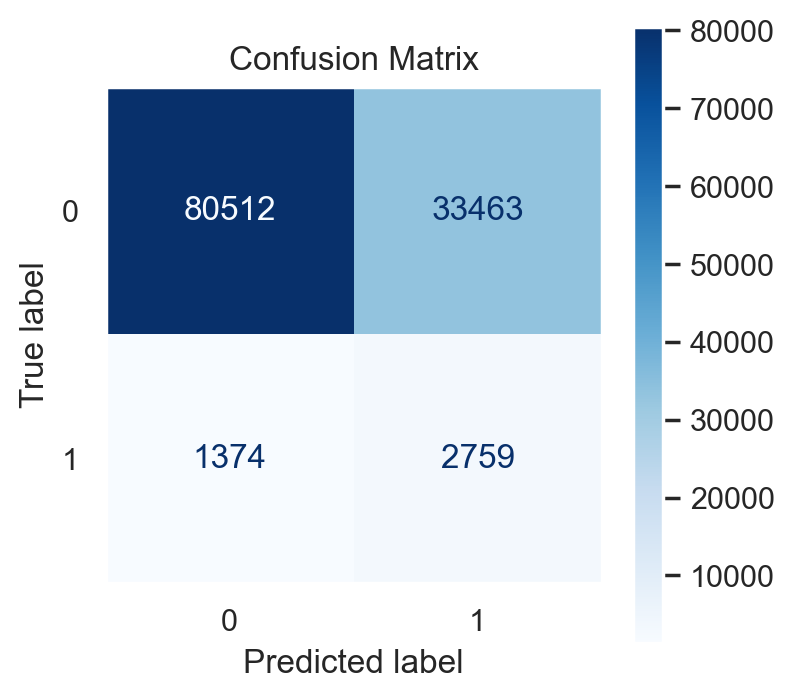

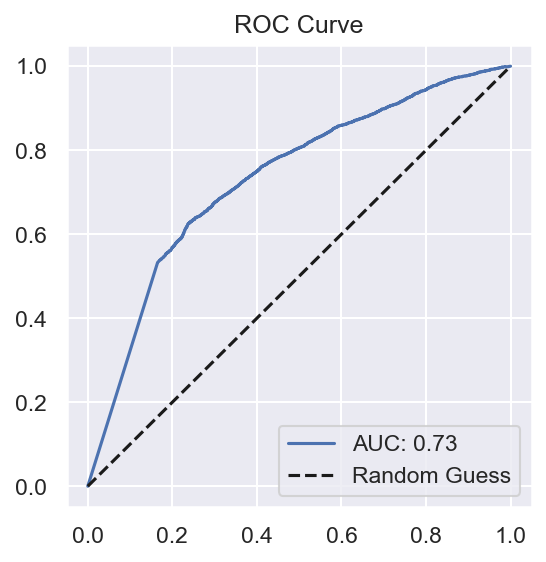

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

gnb = Pipeline(steps=[
    ('classifier', GaussianNB())
])

gnb.fit(X_train_imp, y_train)

evaluate(gnb, X_val_imp, y_val)

# Logistic Regression

              precision  recall  f1-score     support
0                0.9668  0.9991    0.9827  113975.000
1                0.6881  0.0544    0.1009    4133.000
accuracy         0.9660  0.9660    0.9660       0.966
macro avg        0.8274  0.5268    0.5418  118108.000
weighted avg     0.9571  0.9660    0.9518  118108.000
val auc: 0.8200


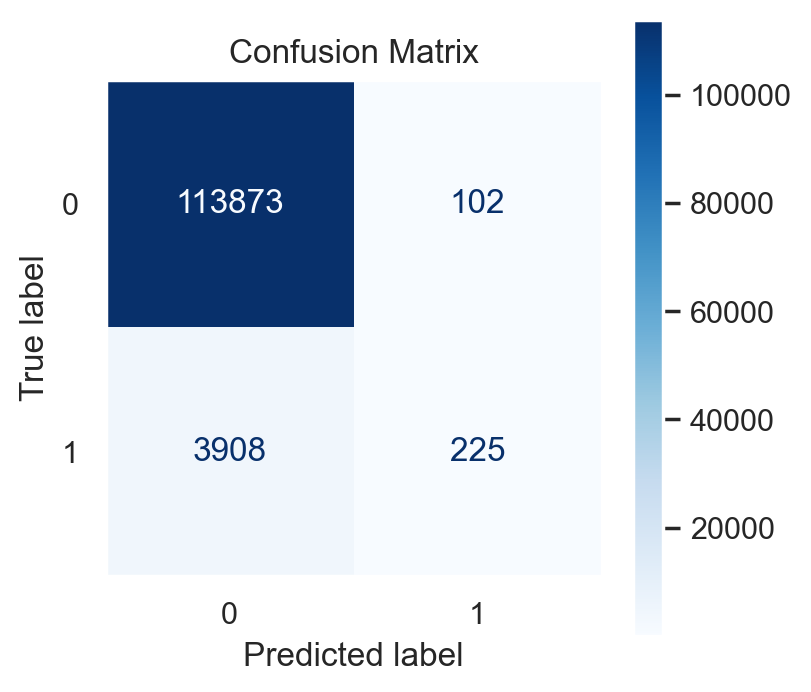

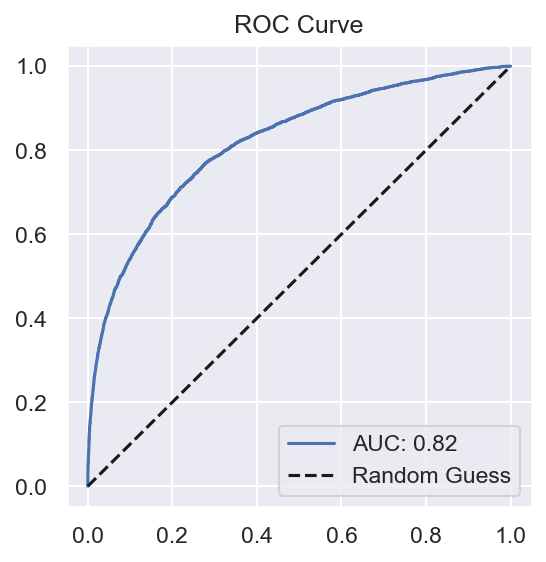

In [117]:
from sklearn.linear_model import LogisticRegression

lr = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=1000, verbose=1))
])

lr.fit(X_train_imp, y_train)

evaluate(lr, X_val_imp, y_val)

# Support Vector Machine

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1990.337329, rho = -0.768940
nSV = 2000, nBSV = 2000
Total nSV = 2000
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1988.301925, rho = -0.826632
nSV = 2000, nBSV = 2000
Total nSV = 2000
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1987.267710, rho = -0.817969
nSV = 2000, nBSV = 2000
Total nSV = 2000
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1986.567560, rho = -0.775222
nSV = 2000, nBSV = 2000
Total nSV = 2000
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1987.233155, rho = -0.722061
nSV = 2000, nBSV = 2000
Total nSV = 2000
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = -1996.880446, rho = -0.659618
nSV = 2000, nBSV = 2000
Total nSV = 2000


/Users/anjali/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision  recall  f1-score      support
0                0.9574  0.5591    0.7059  113975.0000
1                0.0251  0.3133    0.0465    4133.0000
accuracy         0.5505  0.5505    0.5505       0.5505
macro avg        0.4912  0.4362    0.3762  118108.0000
weighted avg     0.9247  0.5505    0.6828  118108.0000
val auc: 0.3977


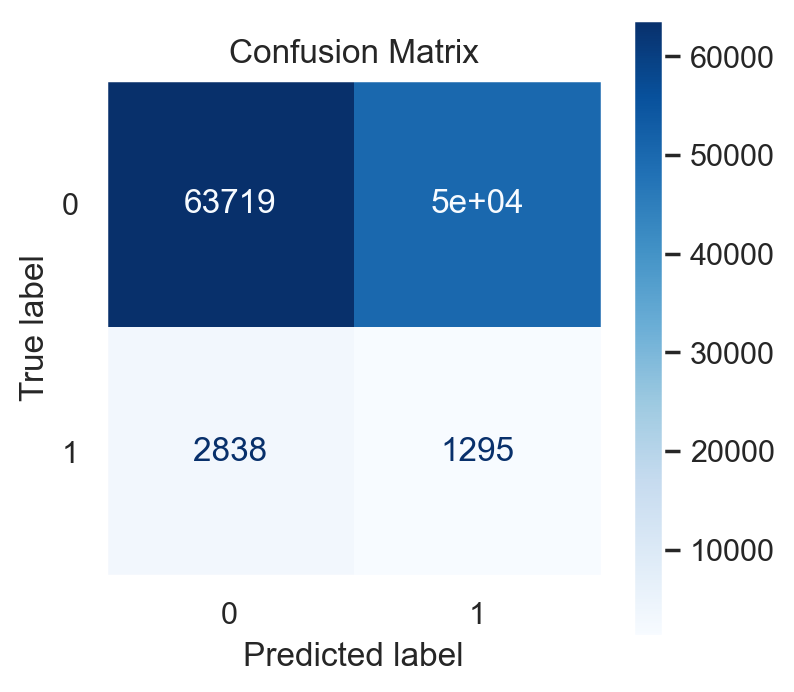

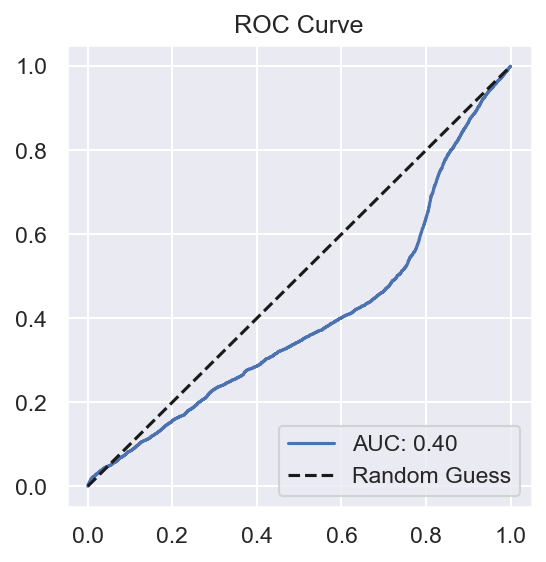

In [118]:
from sklearn.svm import SVC

# Define a pipeline
svm = Pipeline(steps=[
    ('classifier', SVC(max_iter=1000, verbose=1, probability=True))
])

svm.fit(X_train_imp, y_train)
evaluate(svm, X_val_imp, y_val)


# XG Boost

              precision  recall  f1-score      support
0                0.9818  0.9979    0.9898  113975.0000
1                0.8963  0.4892    0.6330    4133.0000
accuracy         0.9801  0.9801    0.9801       0.9801
macro avg        0.9390  0.7436    0.8114  118108.0000
weighted avg     0.9788  0.9801    0.9773  118108.0000
val auc: 0.9430


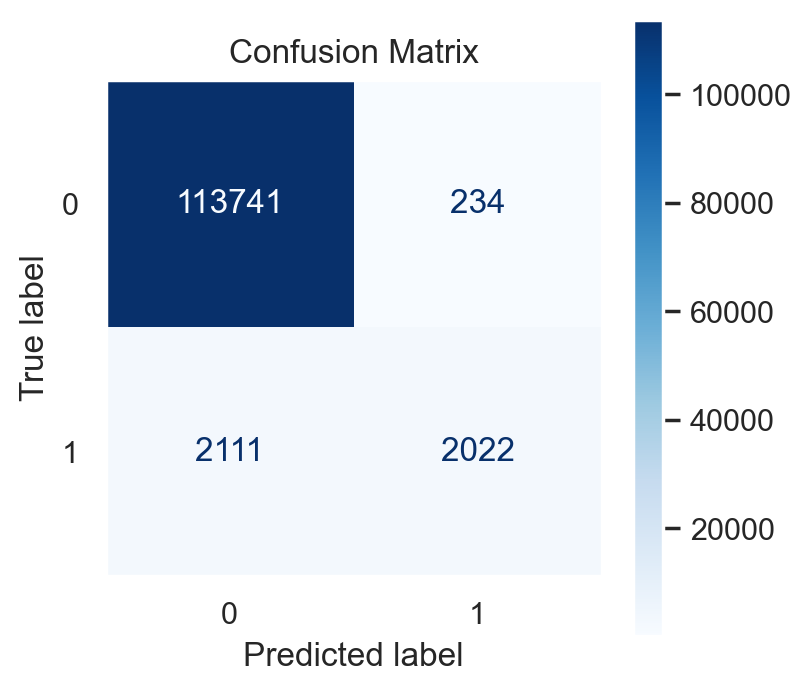

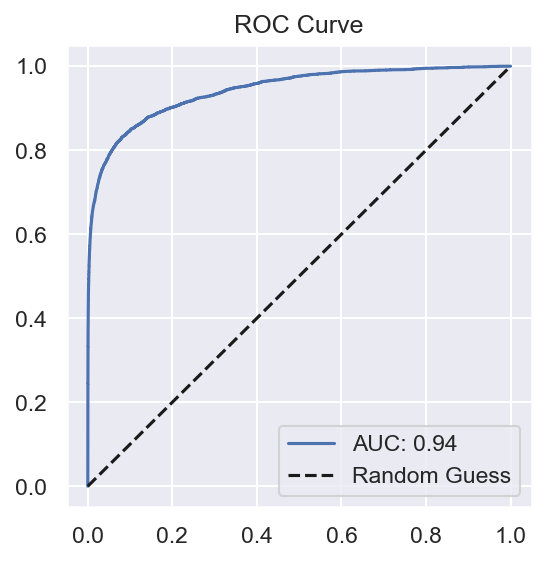

In [268]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Define a pipeline with XGBoost
xgb_pipeline = Pipeline(steps=[
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # Add necessary XGBoost parameters
])

# Fit the pipeline
xgb_pipeline.fit(X_train_imp, y_train)

# Evaluate the model
evaluate(xgb_pipeline, X_val_imp, y_val)


# Feature Importnace for the XG-Boost

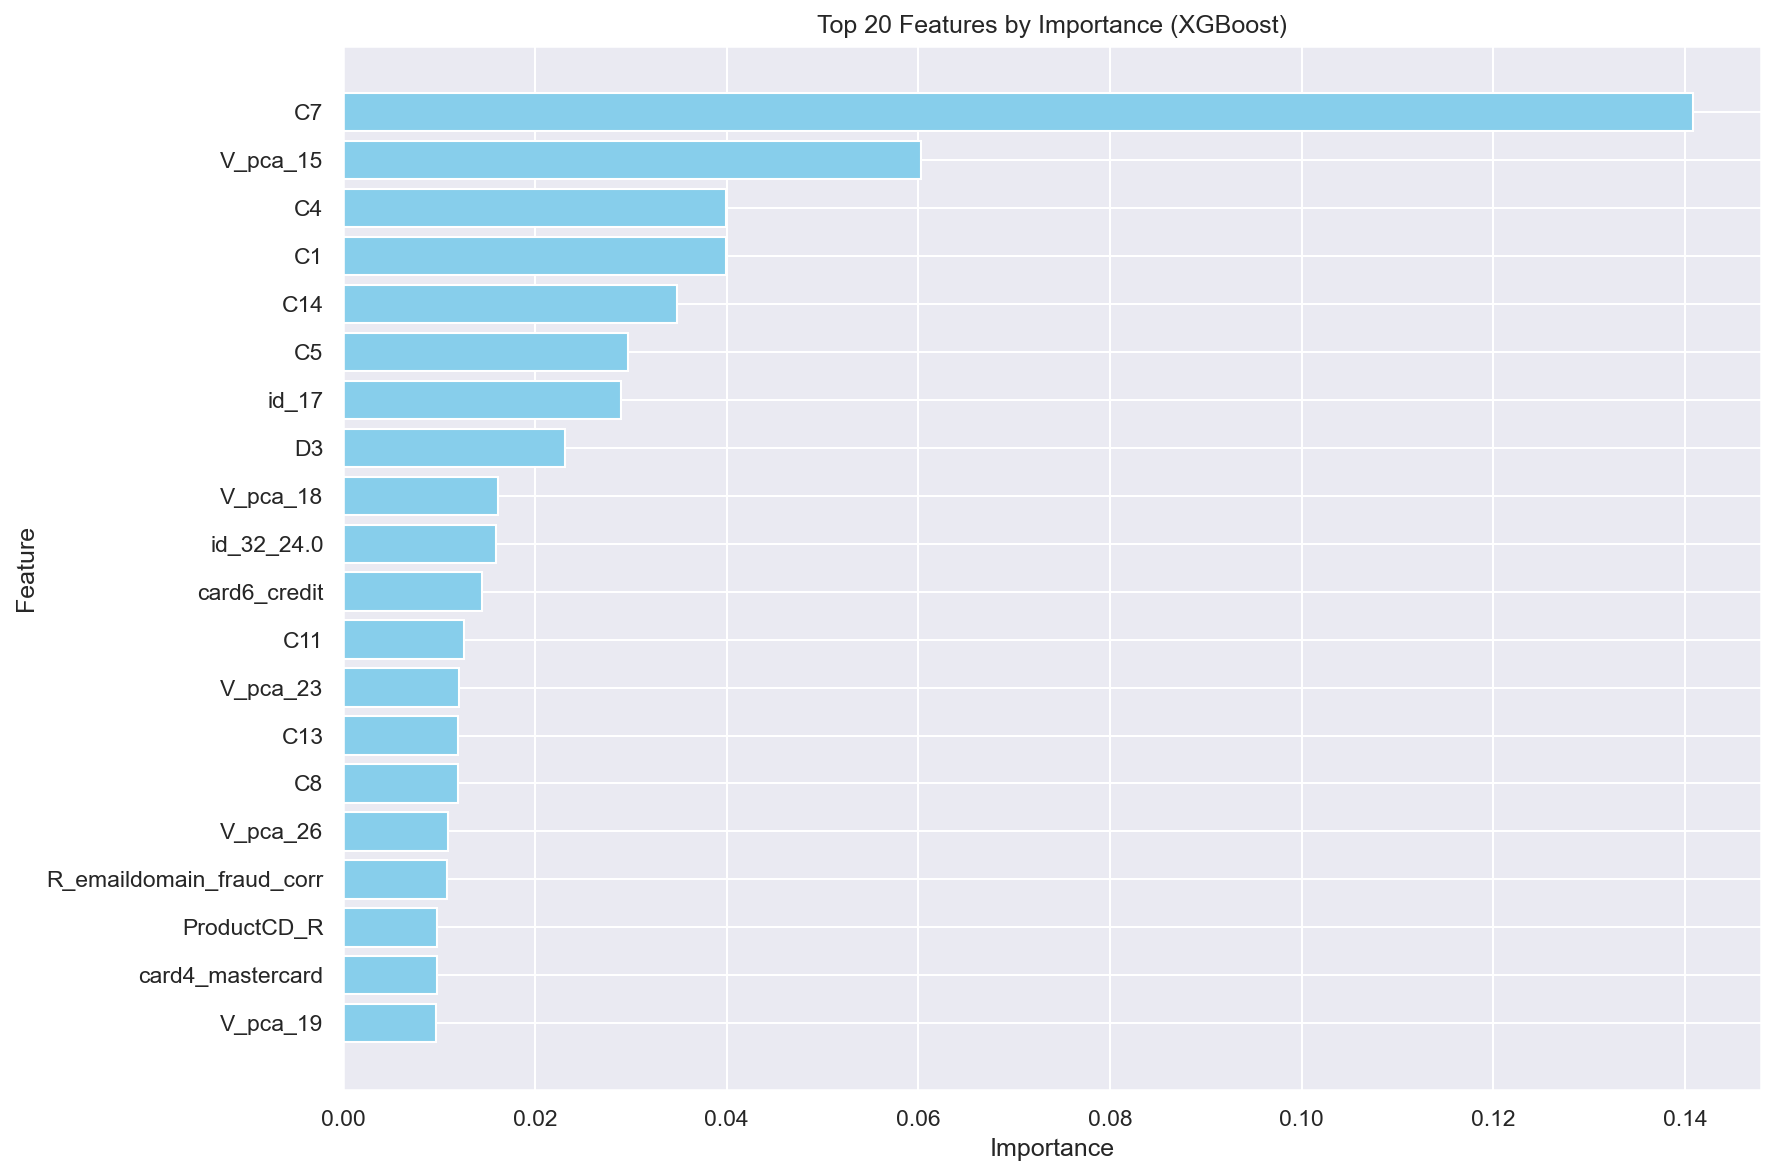

In [48]:


import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Assuming you already have the pipeline
xgb_model = xgb_pipeline.named_steps['classifier']

feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

top_features = importance_df.sort_values(by='Importance', ascending=False).head(20)
plt.figure(figsize=(12, 8), dpi=150)
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance (XGBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Random Forest

              precision  recall  f1-score      support
0                0.9809  0.9992    0.9900  113975.0000
1                0.9542  0.4641    0.6245    4133.0000
accuracy         0.9805  0.9805    0.9805       0.9805
macro avg        0.9676  0.7316    0.8072  118108.0000
weighted avg     0.9800  0.9805    0.9772  118108.0000
val auc: 0.9355


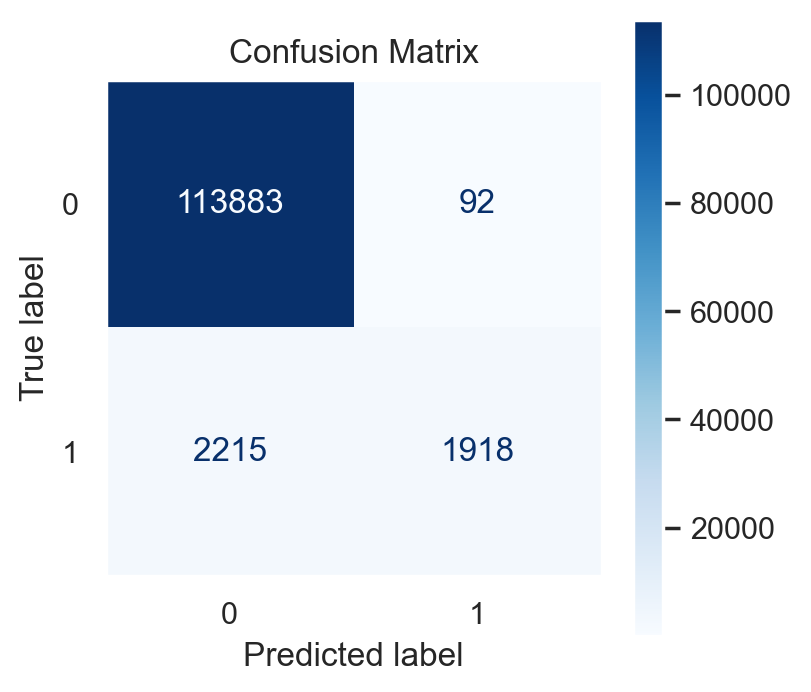

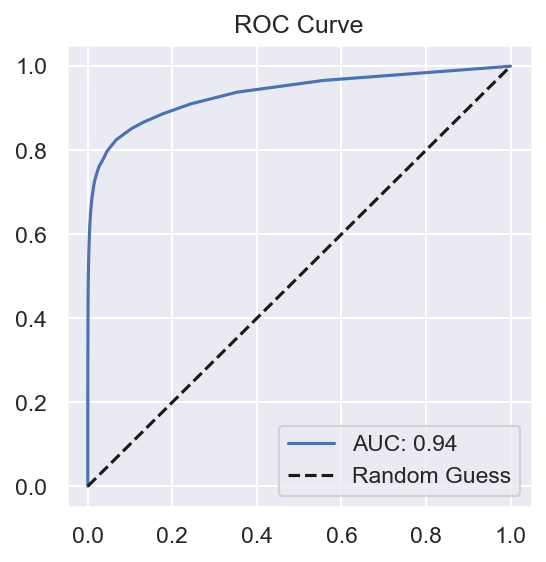

In [120]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Define a pipeline
rf = Pipeline(steps=[
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline
rf.fit(X_train_imp, y_train)
evaluate(rf, X_val_imp, y_val)



## grid Search for the random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_imp, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

# Tuned Random Forest

              precision  recall  f1-score      support
0                0.9799  0.9992    0.9895  113975.0000
1                0.9499  0.4358    0.5974    4133.0000
accuracy         0.9795  0.9795    0.9795       0.9795
macro avg        0.9649  0.7175    0.7935  118108.0000
weighted avg     0.9789  0.9795    0.9757  118108.0000
val auc: 0.9417


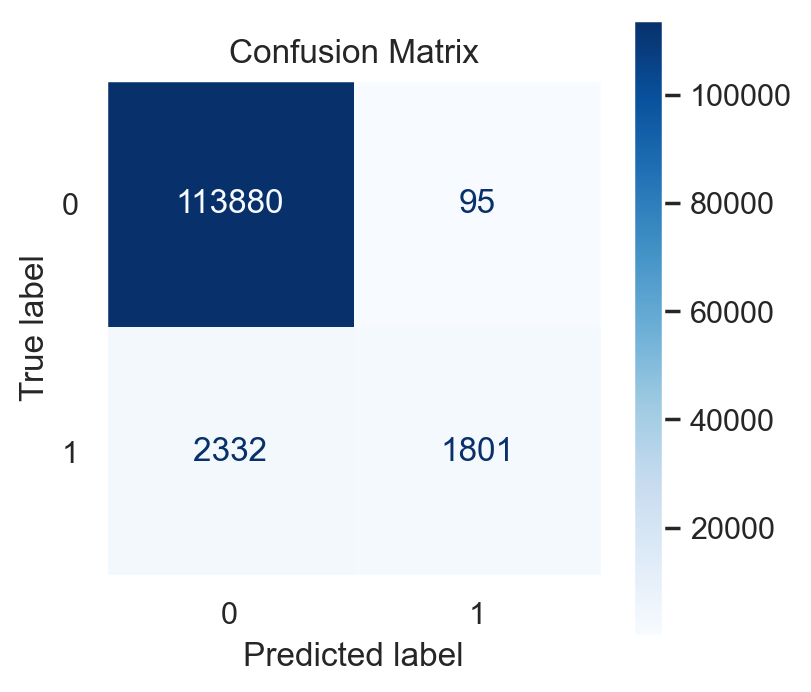

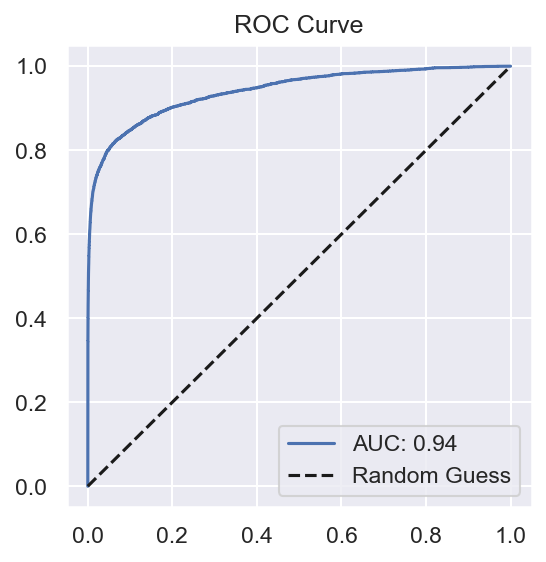

In [152]:
# Define a pipeline
rf = Pipeline(steps=[
    ('classifier', RandomForestClassifier(max_depth=30, max_features='log2',
                                          min_samples_leaf=1, min_samples_split=2,
                                          n_estimators=300))
])

# Fit the pipeline
rf.fit(X_train_imp, y_train)
evaluate(rf, X_val_imp, y_val)


# Plotting the Random Forest Trees

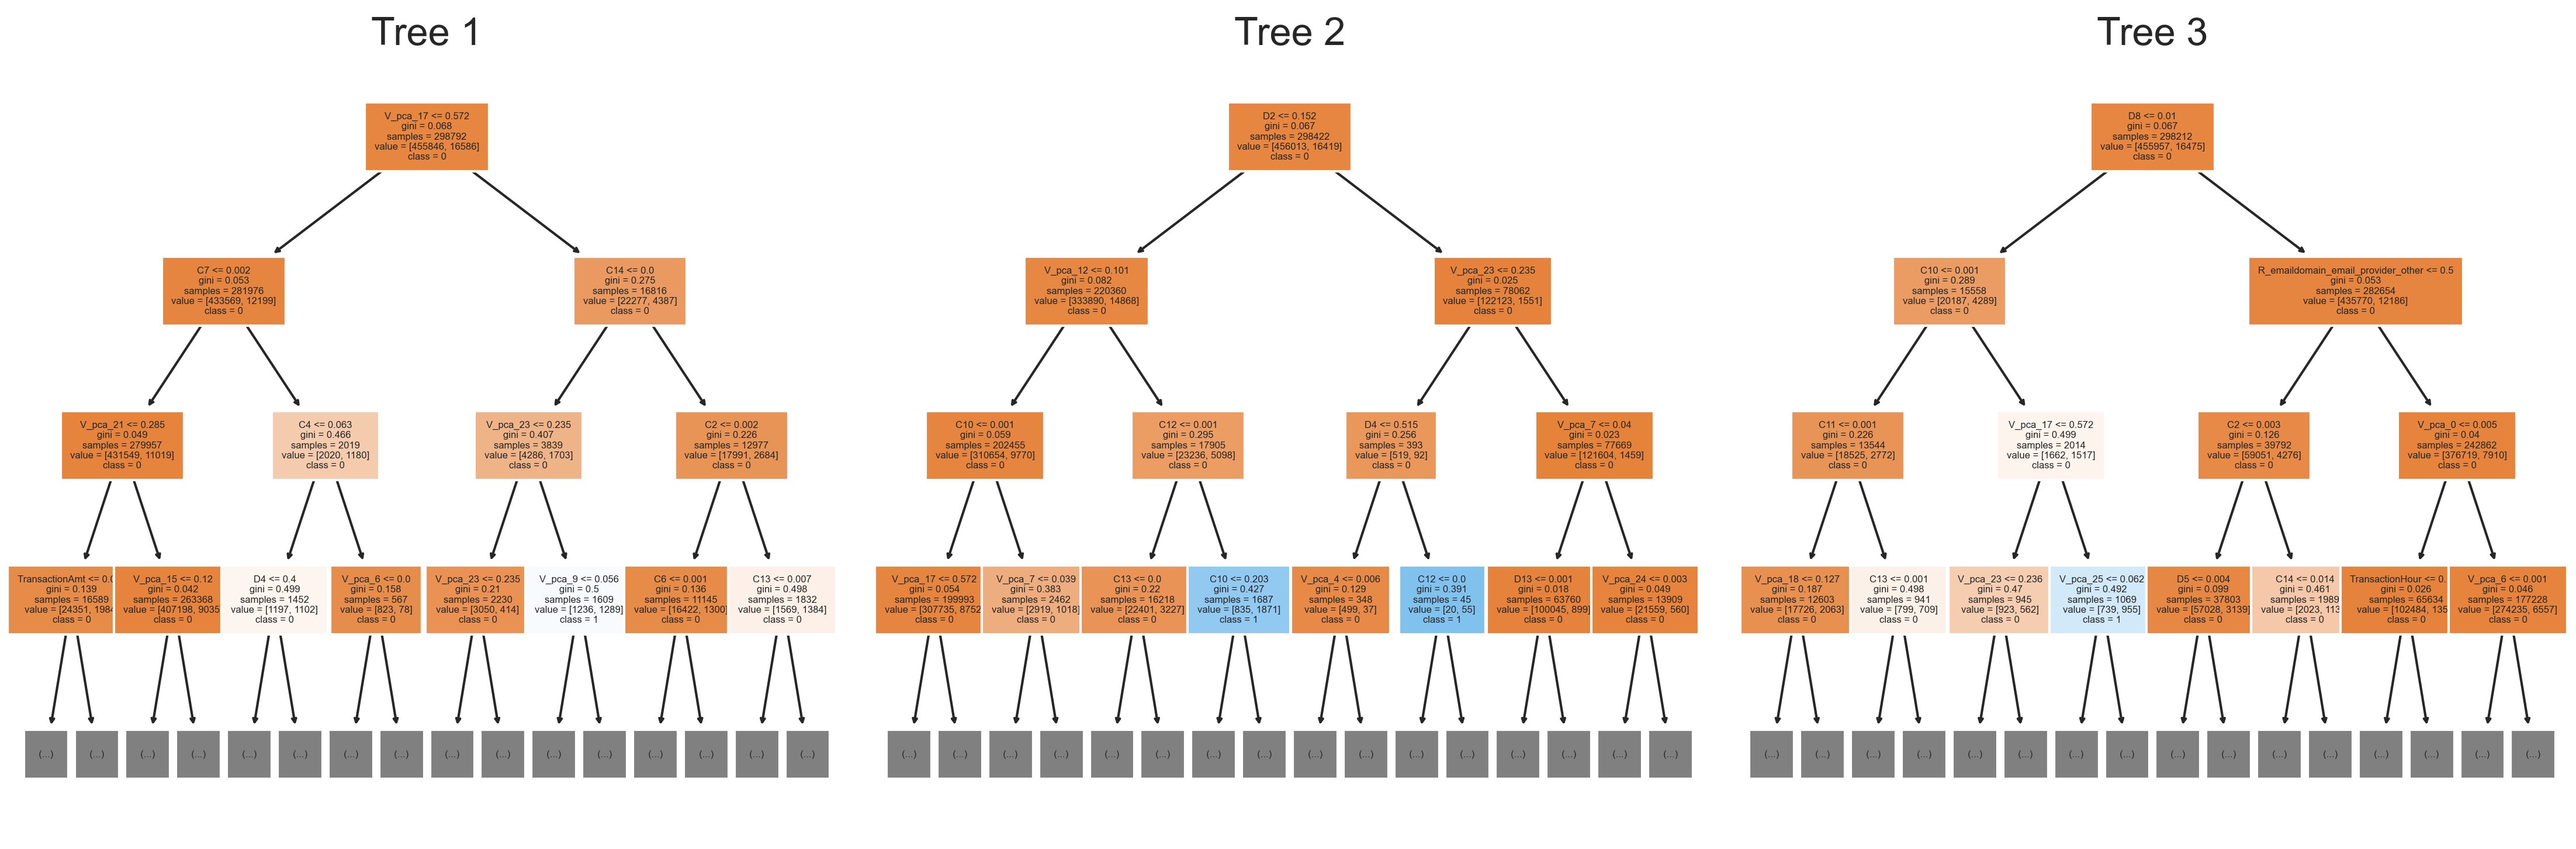

In [153]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have a pipeline with a RandomForestClassifier as the final step
rf2 = rf.named_steps['classifier']  # Replace 'classifier' with the step name in your pipeline

# Define feature and class names
fn = X_train.columns  # Feature names from your dataset
cn = rf2.classes_.astype(str)  # Target class names

# Set the number of trees to plot
n_estimators_to_plot = 3

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=n_estimators_to_plot, figsize=(15, 5), dpi=300)

# Plot each of the first `n_estimators_to_plot` trees
for index in range(n_estimators_to_plot):
    plot_tree(rf2.estimators_[index],
              feature_names=fn,
              class_names=cn,
              filled=True,
              ax=axes[index],
              fontsize=4, max_depth=3)
    axes[index].set_title(f'Tree {index + 1}', fontsize=16)

# Adjust layout and save figure
plt.tight_layout()
fig.savefig('rf_n_trees.png')
plt.show()


# Random Forest Feature Importance

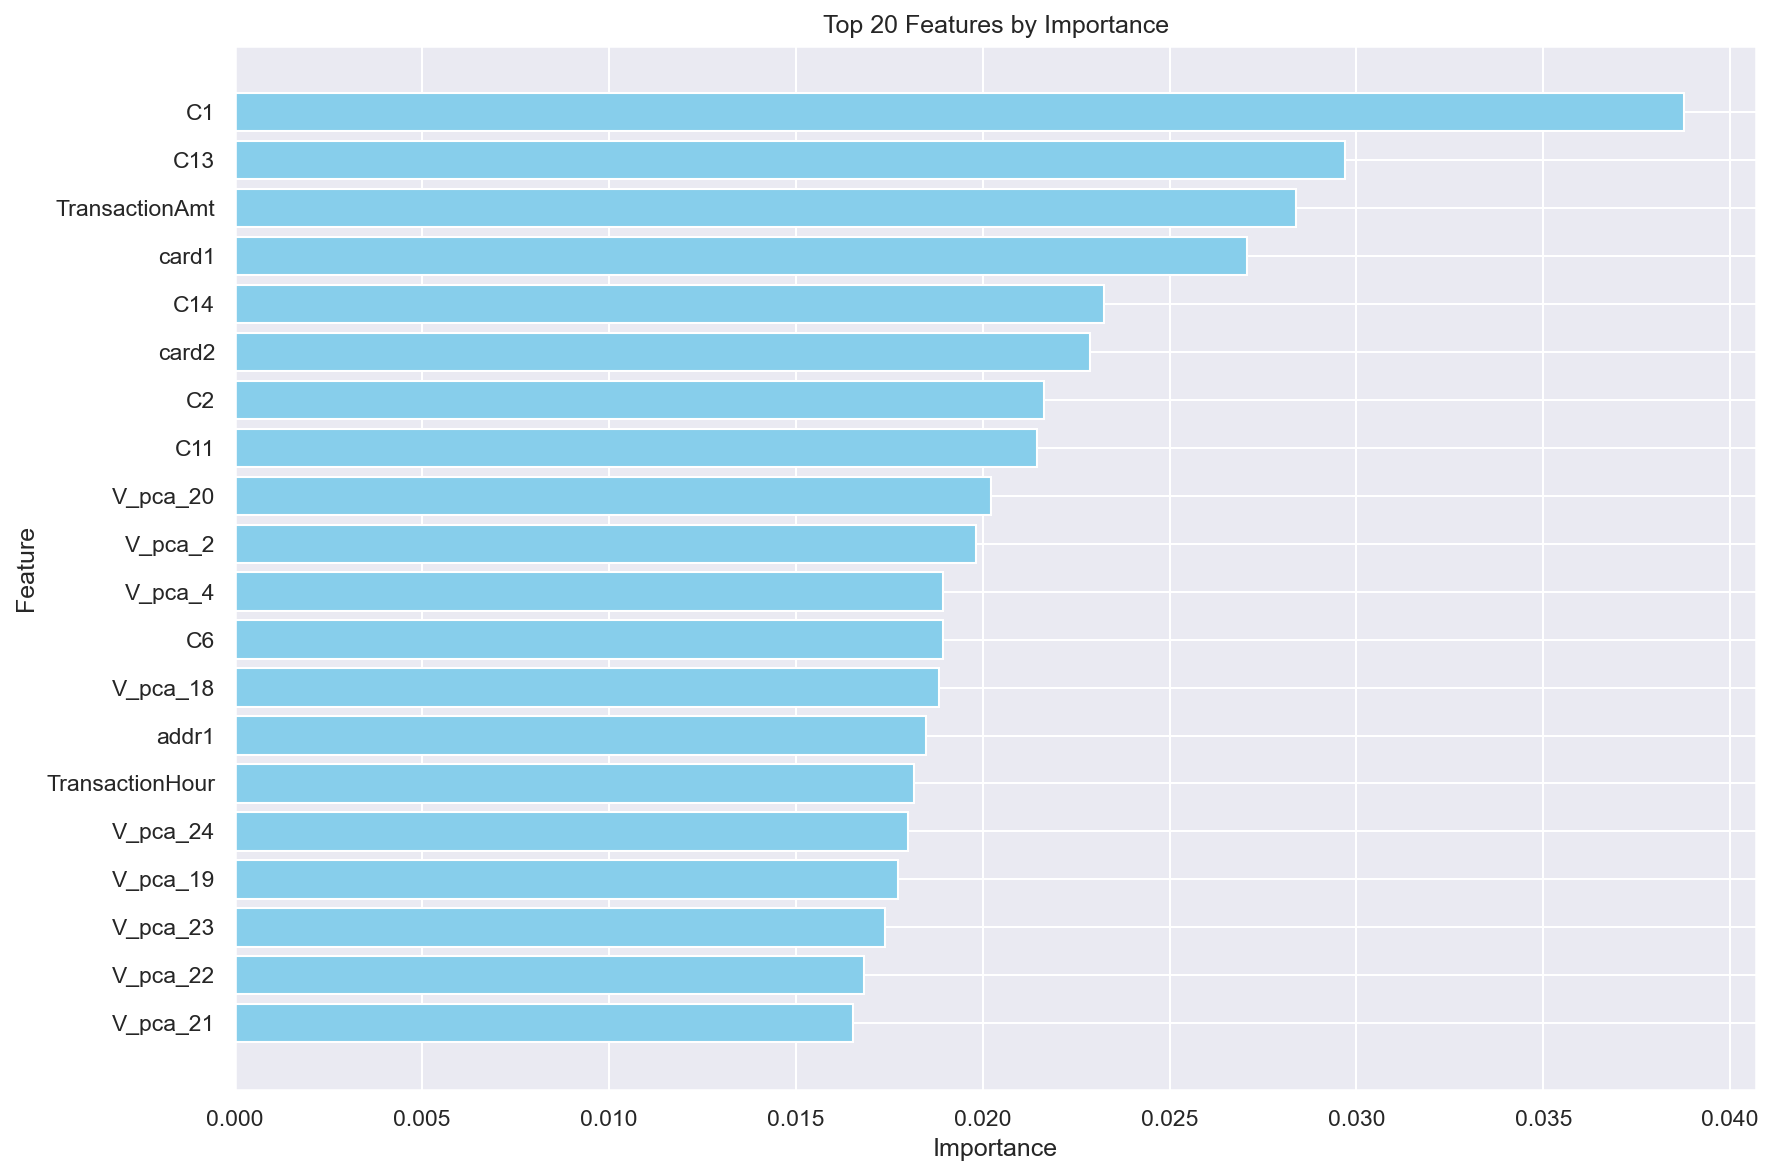

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming you already have the pipeline
rf2 = rf.named_steps['classifier']  # Extract RandomForestClassifier from the pipeline

# Extract feature importances and feature names
feature_importances = rf2.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance and select the top 10 features
top_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 10 features
plt.figure(figsize=(12, 8), dpi=150)
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top
plt.tight_layout()
plt.show()


# Decision Tree

Fitting 1 folds for each of 216 candidates, totalling 216 fits


/Users/anjali/anaconda3/envs/python310/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'imputer__strategy': 'mean'}
              precision  recall  f1-score      support
0                0.9848  0.9805    0.9827  113975.0000
1                0.5205  0.5829    0.5499    4133.0000
accuracy         0.9666  0.9666    0.9666       0.9666
macro avg        0.7527  0.7817    0.7663  118108.0000
weighted avg     0.9686  0.9666    0.9675  118108.0000
val auc: 0.7817


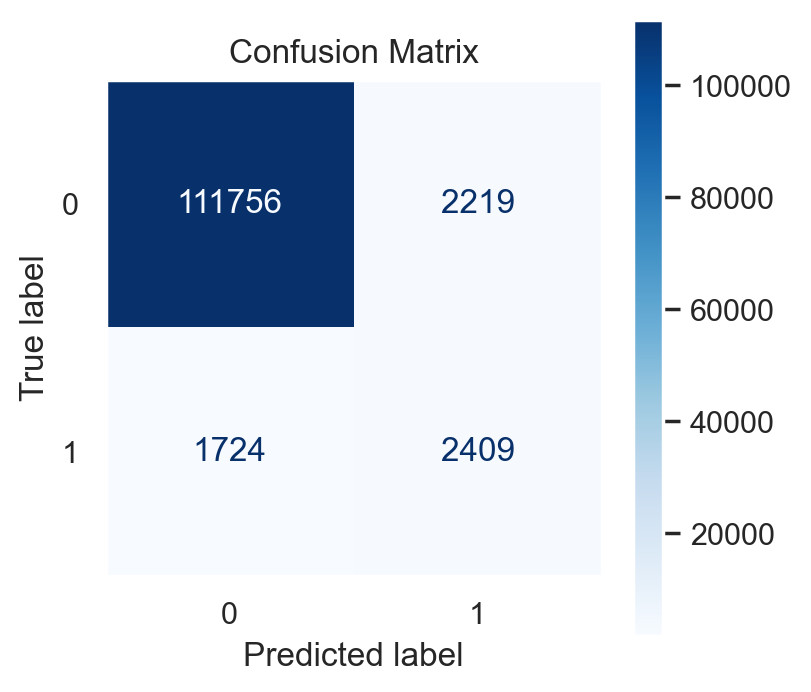

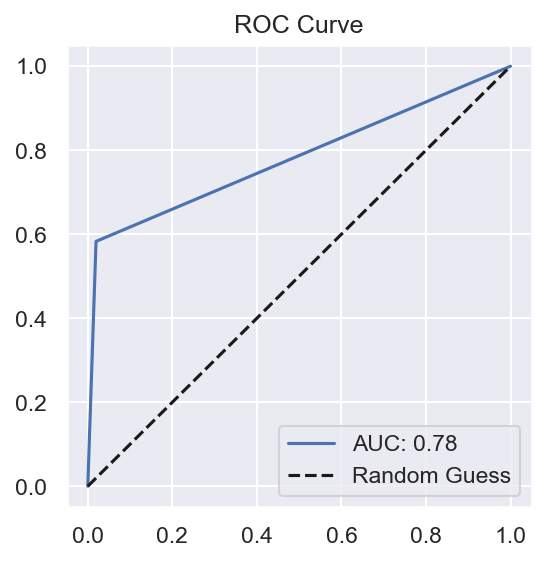

In [150]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, PredefinedSplit
import collections


from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

imputer = SimpleImputer()
classifier = DecisionTreeClassifier()

pipeline = Pipeline(steps=[('imputer', imputer),
                           ('classifier', classifier)])

# Define the parameter grid for GridSearchCV
param_grid = {
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}


grid_search_dt = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=[(slice(None), slice(None))], verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Get the best pipeline from GridSearchCV
best_clf_dt = grid_search_dt.best_estimator_

# Print best parameters and score
print("Best Parameters:", grid_search_dt.best_params_)
evaluate(best_clf_dt, X_val, y_val)


# Plot decision tree

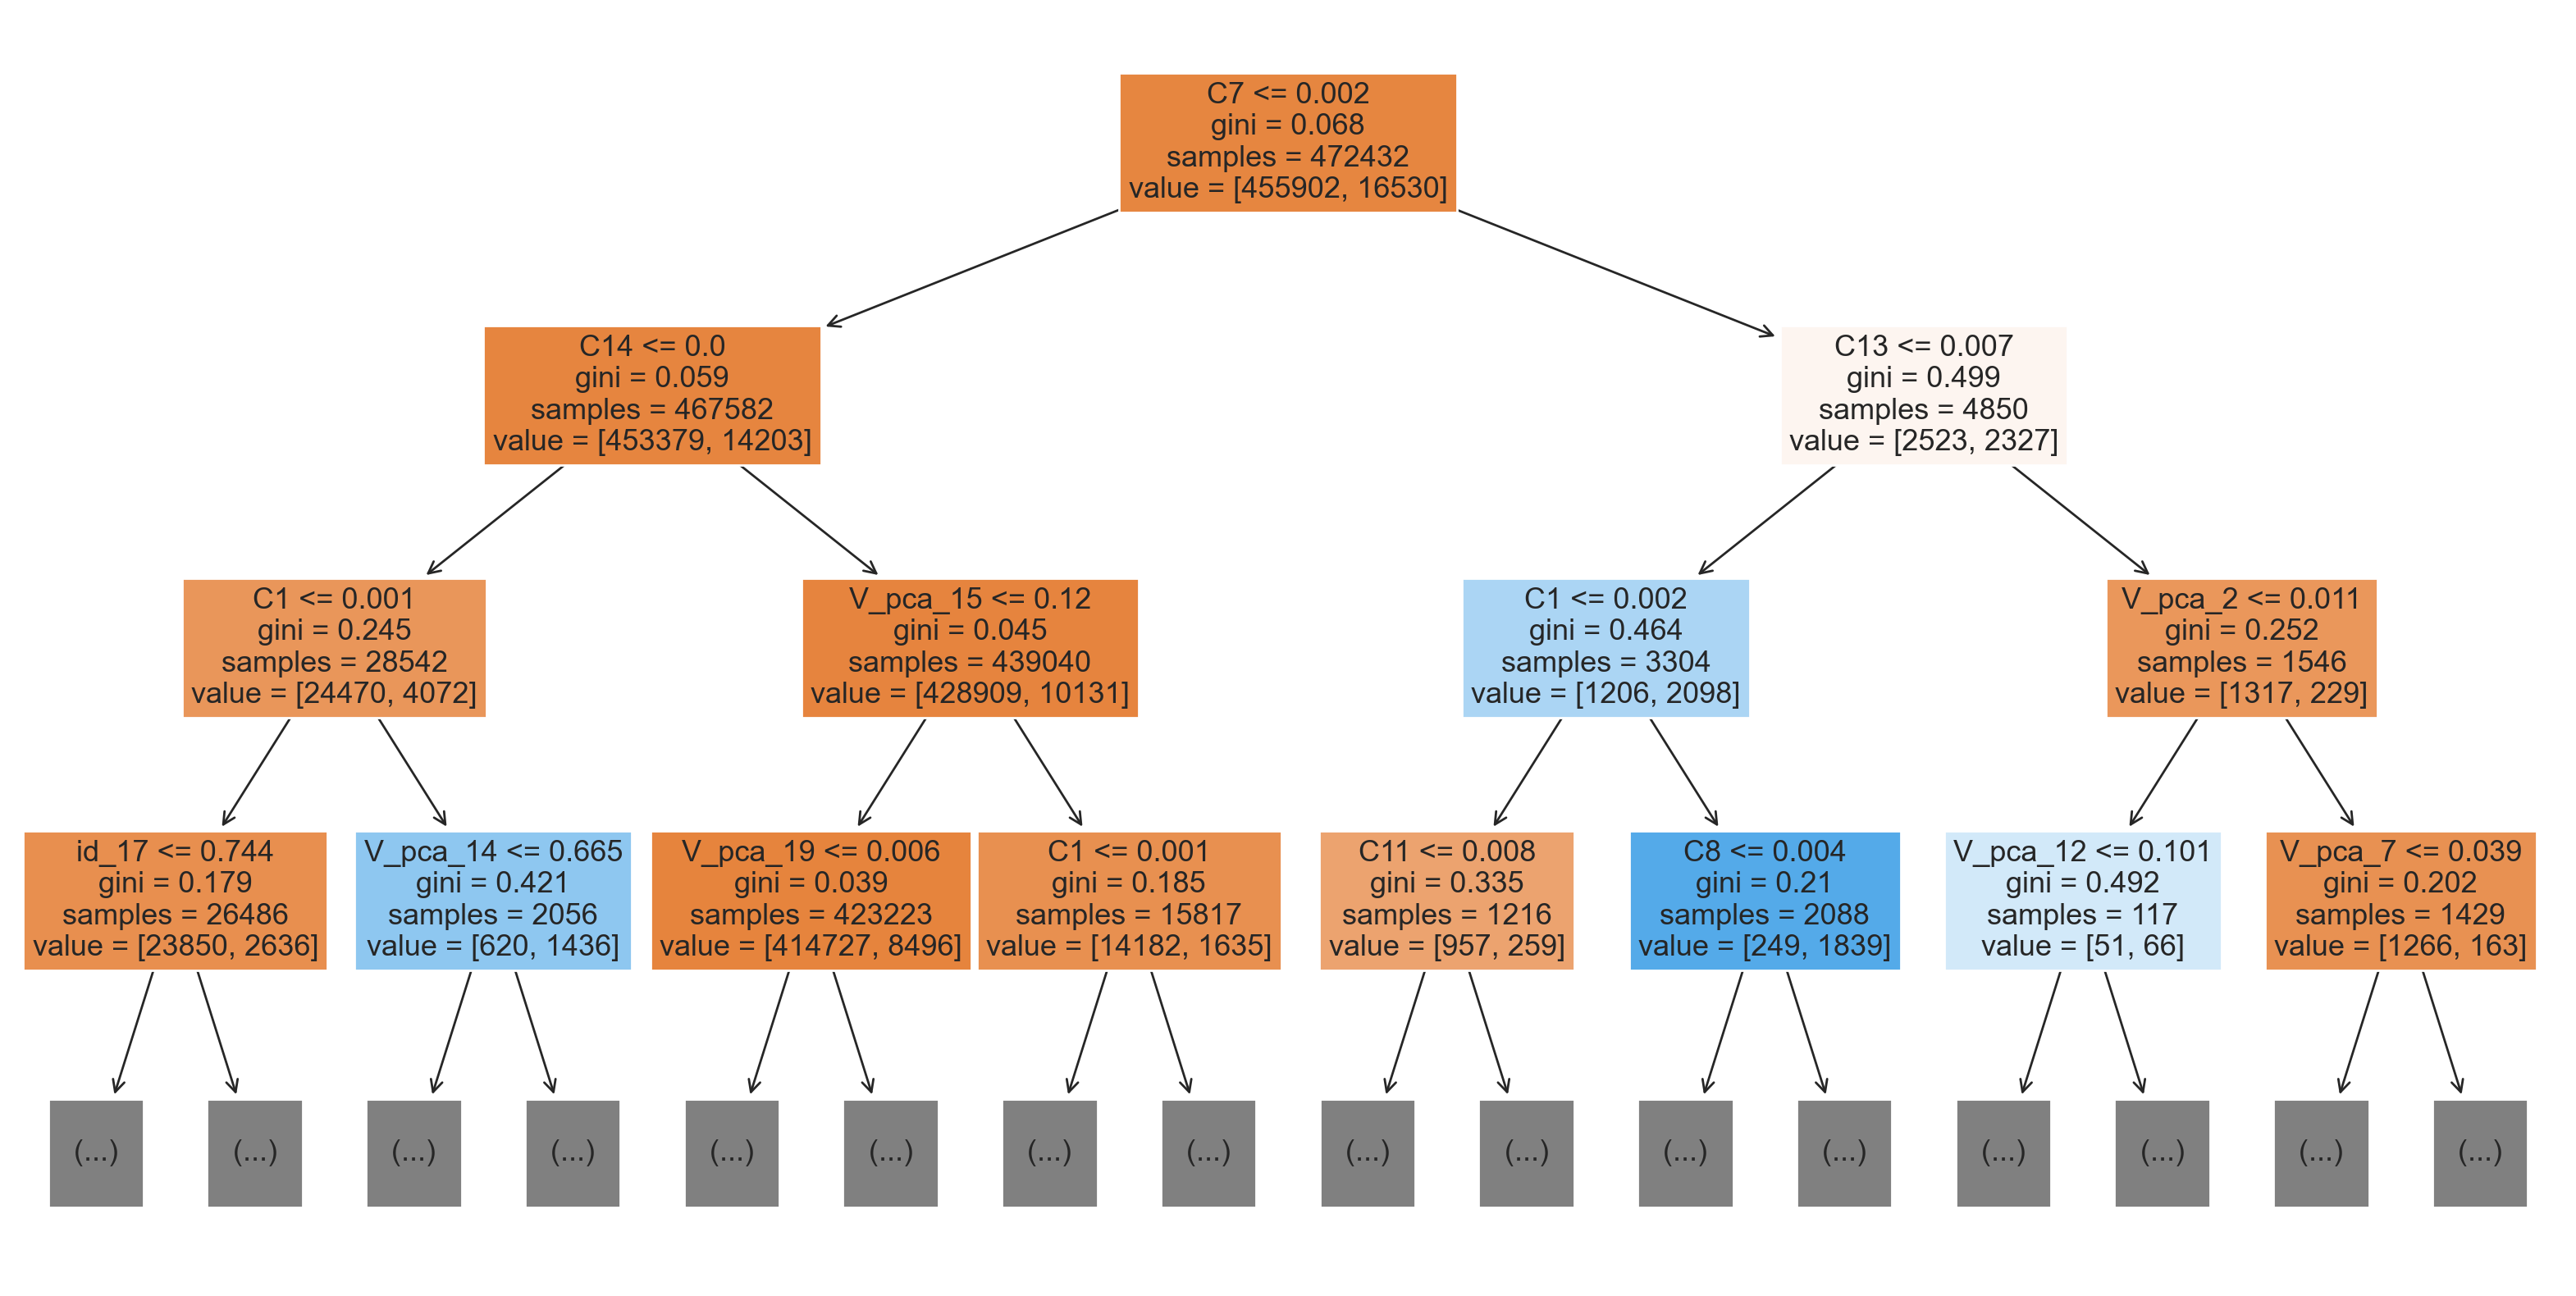

In [156]:
# plot the best decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10), dpi=200)
plot_tree(best_clf_dt.named_steps['classifier'], feature_names=X_train.columns, filled=True, fontsize=13, max_depth=3)
plt.show()

# Result Analysis

In [259]:

y_pred = rf2.predict(X_val_imp)

# Get matched indices without duplicates
matched_indices = np.unique(np.where(y_val == y_pred)[0])

# Extract matched samples and align indices
matched_samples = X_val.iloc[matched_indices]
y_val2 = pd.Series(y_val, index=X_val.index, name="isFraud")  # Ensure aligned indices

# Concatenate matched samples with isFraud
matched_data_orig = pd.concat([matched_samples, y_val2.iloc[matched_indices]], axis=1)

# Add predictions with proper indexing
pred_df = pd.DataFrame(y_pred, index=X_val.index, columns=['prediction'])
pred_series_filtered = pred_df.iloc[matched_indices]

# Combine all data
matched_data = pd.concat([matched_data_orig, pred_series_filtered], axis=1)

# Set column names
matched_data.columns = list(matched_samples.columns) + ['isFraud', 'prediction']

# Verify results
print(matched_data.columns, matched_samples.shape, matched_data_orig.shape, matched_data.shape)

matched_data

Index(['DeviceType_mobile', 'M1_T', 'M2_T', 'M3_T', 'M4_M1', 'M4_M2', 'M5_T',
       'M6_T', 'M7_T', 'M8_T',
       ...
       'addr2', 'id_13', 'id_14', 'id_17', 'id_19', 'id_20', 'width', 'height',
       'isFraud', 'prediction'],
      dtype='object', length=141) (115681, 139) (115681, 140) (115681, 141)


,DeviceType_mobile,M1_T,M2_T,M3_T,M4_M1,M4_M2,M5_T,M6_T,M7_T,M8_T,...,addr2,id_13,id_14,id_17,id_19,id_20,width,height,isFraud,prediction
316078,False,True,True,False,False,False,False,True,False,False,...,0.836957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
116888,False,False,False,False,False,True,False,False,False,False,...,NaN,0.777778,NaN,0.968992,0.269702,0.725490,NaN,NaN,0,0
410211,False,True,True,True,True,False,True,True,True,True,...,0.836957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
251027,False,False,False,False,False,False,False,False,False,False,...,0.836957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
191265,False,True,True,True,False,False,False,True,False,False,...,0.836957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105168,False,False,False,False,False,False,False,False,False,False,...,0.836957,0.722222,0.26087,0.511628,0.371278,0.885918,0.384,0.36,0,0
119307,False,True,True,True,False,False,False,False,False,True,...,0.836957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
145129,False,False,False,False,False,False,False,False,False,False,...,NaN,0.777778,NaN,0.968992,0.290718,0.725490,NaN,NaN,1,1
500536,False,True,True,False,False,False,False,False,False,False,...,0.836957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [260]:
# misclassified_indices = np.where(y_val != y_pred)[0]
# misclassified_samples = X_val.iloc[misclassified_indices]
#
# missed_data_orig = pd.concat([misclassified_samples, y_val2.iloc[misclassified_indices]], axis=1)
#
# pred_df = pd.DataFrame(y_pred, columns=['prediction']).squeeze()
# pred_df.index = y_val2.index
# pred_series_filtered = pred_df.iloc[misclassified_indices]
#
# missed_data = pd.concat([missed_data_orig, pred_series_filtered], axis=1)
# missed_data.columns = list(misclassified_samples.columns) + ['isFraud', 'prediction']
# print(missed_data.columns, misclassified_samples.shape, missed_data_orig.shape, missed_data.shape)
# missed_data

# Get misclassified indices without duplicates
misclassified_indices = np.unique(np.where(y_val != y_pred)[0])

# Extract misclassified samples and align indices
misclassified_samples = X_val.iloc[misclassified_indices]
y_val2 = pd.Series(y_val, index=X_val.index, name="isFraud")  # Ensure aligned indices

# Concatenate misclassified samples with isFraud
missed_data_orig = pd.concat([misclassified_samples, y_val2.iloc[misclassified_indices]], axis=1)

# Add predictions with proper indexing
pred_df = pd.DataFrame(y_pred, index=X_val.index, columns=['prediction'])
pred_series_filtered = pred_df.iloc[misclassified_indices]

# Combine all data
missed_data = pd.concat([missed_data_orig, pred_series_filtered], axis=1)

# Set column names
missed_data.columns = list(misclassified_samples.columns) + ['isFraud', 'prediction']

# Verify results
print(missed_data.columns, misclassified_samples.shape, missed_data_orig.shape, missed_data.shape)
missed_data

Index(['DeviceType_mobile', 'M1_T', 'M2_T', 'M3_T', 'M4_M1', 'M4_M2', 'M5_T',
       'M6_T', 'M7_T', 'M8_T',
       ...
       'addr2', 'id_13', 'id_14', 'id_17', 'id_19', 'id_20', 'width', 'height',
       'isFraud', 'prediction'],
      dtype='object', length=141) (2427, 139) (2427, 140) (2427, 141)


,DeviceType_mobile,M1_T,M2_T,M3_T,M4_M1,M4_M2,M5_T,M6_T,M7_T,M8_T,...,addr2,id_13,id_14,id_17,id_19,id_20,width,height,isFraud,prediction
143565,False,True,False,False,False,False,True,False,False,False,...,0.836957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
548134,False,False,False,False,False,False,False,False,False,False,...,0.836957,NaN,0.26087,0.511628,0.418564,0.771836,0.136533,0.1536,1,0
271322,False,True,True,True,False,False,False,False,False,False,...,0.836957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
186375,True,False,False,False,False,False,False,False,False,False,...,0.836957,0.722222,0.26087,0.511628,0.677758,0.891266,0.177867,0.1500,1,0
343092,False,True,True,True,False,False,False,True,False,False,...,0.836957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273737,False,False,False,False,True,False,False,False,False,False,...,NaN,0.777778,NaN,0.968992,0.269702,0.725490,NaN,NaN,0,1
365420,False,False,False,False,False,True,False,False,False,False,...,NaN,0.777778,NaN,0.968992,0.572680,0.401070,NaN,NaN,1,0
217966,True,False,False,False,False,True,False,False,False,False,...,NaN,0.722222,NaN,0.968992,0.572680,0.401070,NaN,NaN,0,1
352973,True,False,False,False,False,False,False,False,False,False,...,NaN,0.425926,NaN,0.968992,0.290718,0.048128,NaN,NaN,1,0


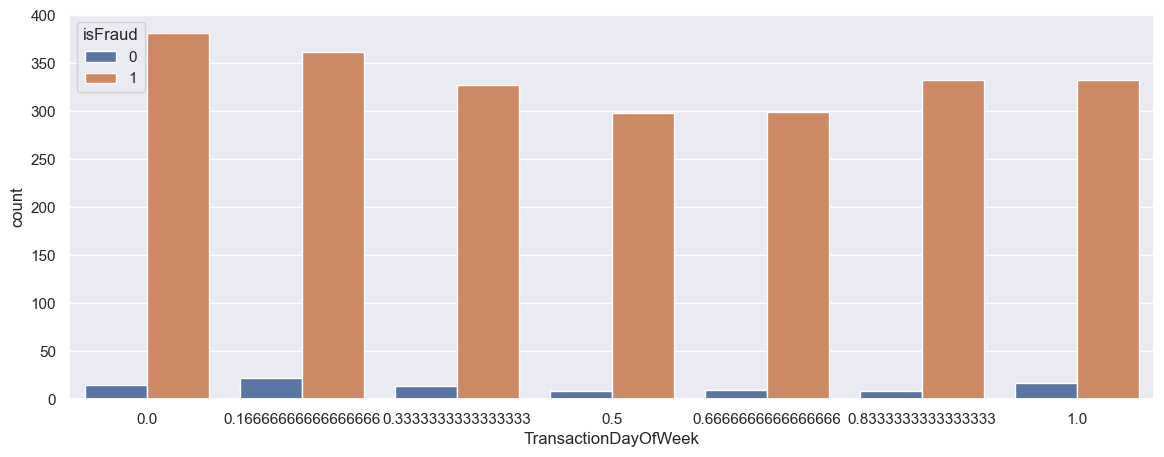

In [261]:
plt.figure(figsize=(14,5))
sns.countplot(x='TransactionDayOfWeek', hue='isFraud', data=missed_data)
plt.show()

In [262]:
missed_data.shape


(2427, 141)

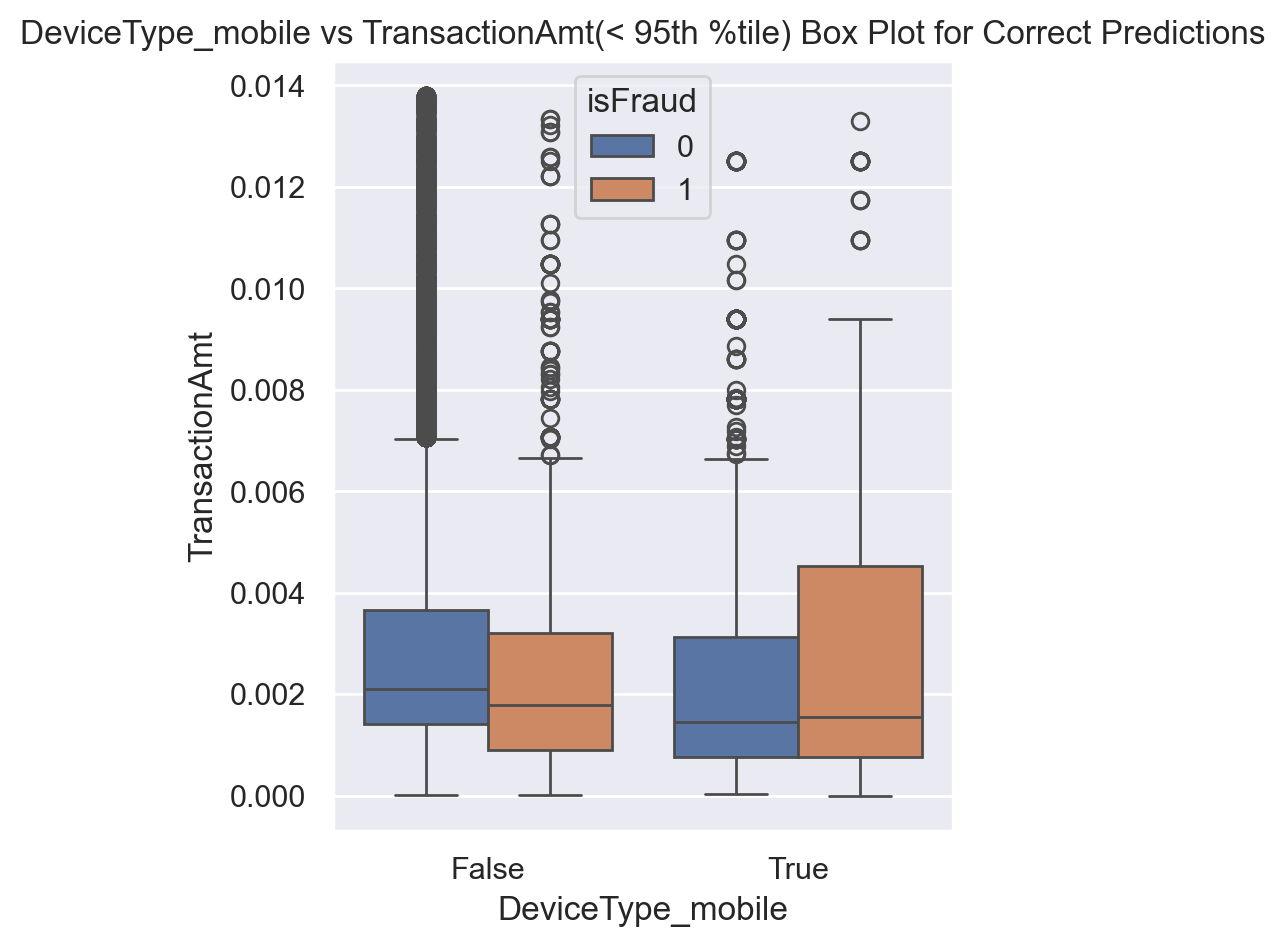

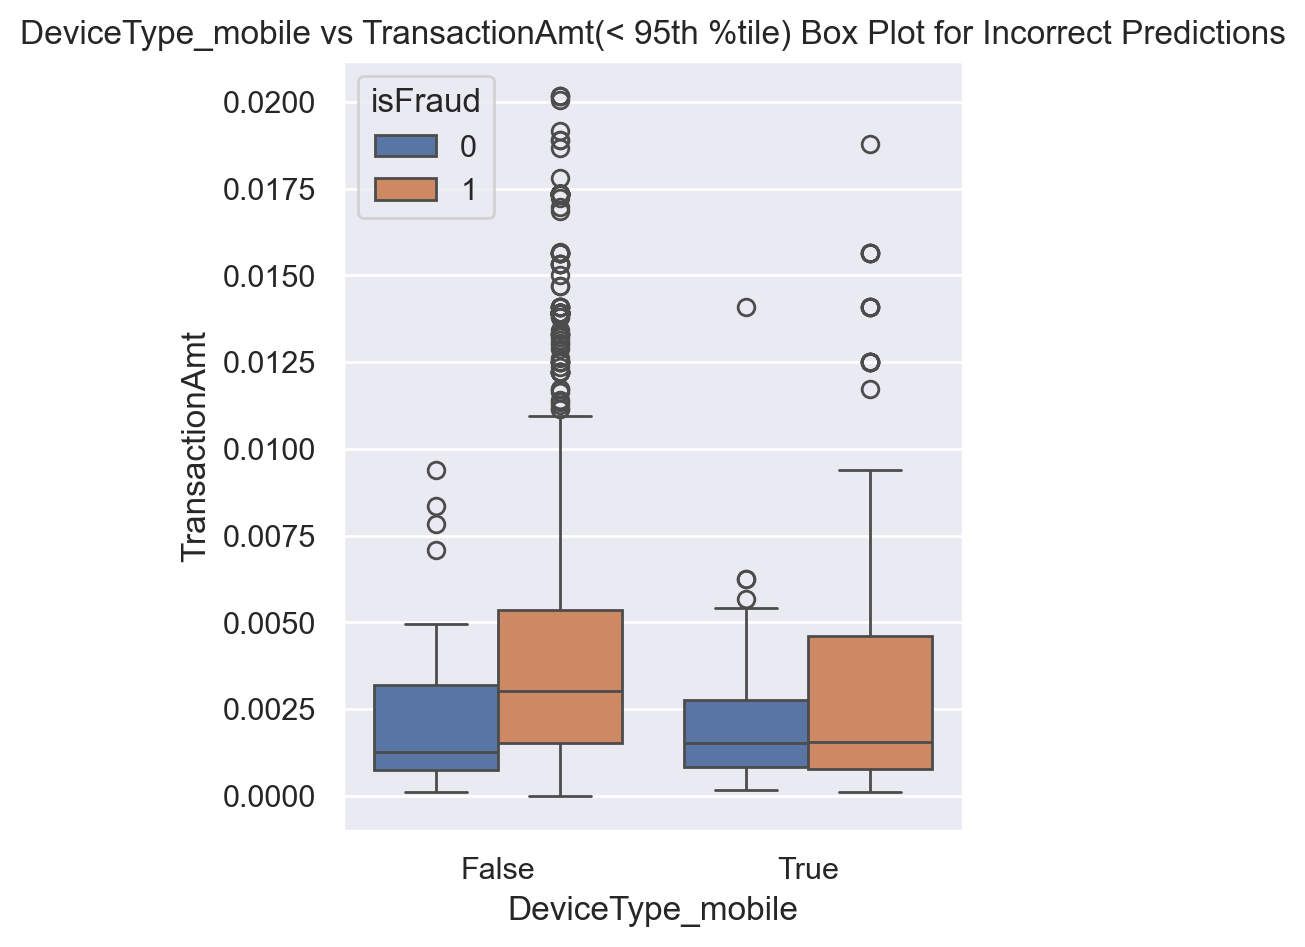

In [263]:
column = "DeviceType_mobile"
against = "TransactionAmt"
plt.figure(figsize=(4,5), dpi=200)
sns.boxplot(x=column, y=against, hue='isFraud', data=matched_data[matched_data[against]<=np.percentile(matched_data[against], 95)])
plt.title(f'{column} vs {against}(< 95th %tile) Box Plot for Correct Predictions')
plt.show()

plt.figure(figsize=(4,5), dpi=200)
sns.boxplot(x=column, y=against, hue='isFraud', data=missed_data[missed_data[against]<=np.percentile(missed_data[against], 95)])
plt.title(f'{column} vs {against}(< 95th %tile) Box Plot for Incorrect Predictions')
plt.show()